# **DATA UNDERSTANDING**

## ***Load Data***

In [1]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Kaggle/Titanic - Machine Learning from Disaster/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/Titanic - Machine Learning from Disaster/test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## ***Overview Data***

### *Train Data*

In [4]:
print('Jumlah baris : {}'.format(train.shape[0]))
print('Jumlah fitur : {}'.format(train.shape[1]))

Jumlah baris : 891
Jumlah fitur : 12


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum().to_frame().rename(columns={0:'Null Vallues'})[train.isnull().sum()>0]

,Null Vallues
Age,177
Cabin,687
Embarked,2


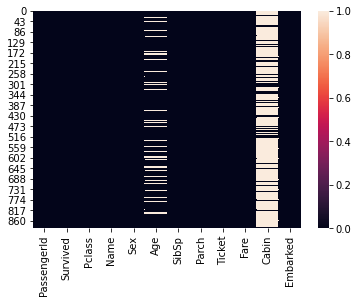

In [7]:
import seaborn as sns
sns.heatmap(train.isnull())

### *Test Data*

In [8]:
print('Jumlah baris : {}'.format(test.shape[0]))
print('Jumlah fitur : {}'.format(test.shape[1]))

Jumlah baris : 418
Jumlah fitur : 11


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.isnull().sum().to_frame().rename(columns={0:'Null Vallues'})[test.isnull().sum()>0]

,Null Vallues
Age,86
Fare,1
Cabin,327


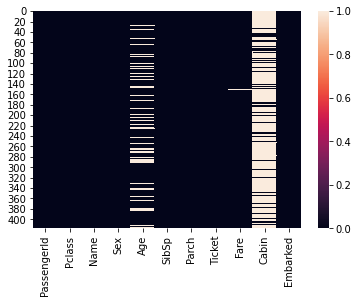

In [11]:
sns.heatmap(test.isnull())

# **DATA PREPROCESSING**

### *Train Data*

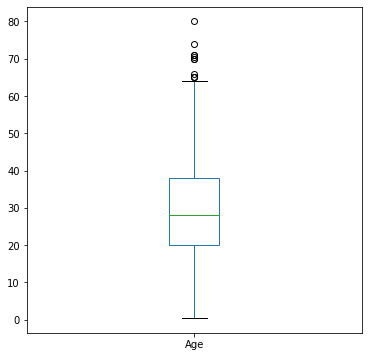

In [12]:
# identifikasi outlier variabel age pada data train
import matplotlib.pyplot as plt
train['Age'].plot(kind='box', figsize=(6, 6))
plt.show()

In [13]:
# cek korelasi variabel age dengan variabel lainnya
corr = train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
corr[corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
31,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [14]:
# mencari nilai median variabel age berdasarkan pcalss & sex
age_by_pclass_sex = train.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(train['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [15]:
# mengganti missing value dengan nilai median berdasarkan pclass & sex
train['Age'] = train.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [16]:
# hapus kolom cabin pada data train
train.drop(columns=['Cabin'], axis=0, inplace=True)

In [17]:
# ganti missing value dengan modus variabel embarked pada data train
modus_embarked = train['Embarked'].mode()[0]
print('Modus dari Embarked:', modus_embarked)

Modus dari Embarked: S


In [18]:
import numpy as np

train['Embarked'].replace(np.nan, modus_embarked, inplace=True)

In [19]:
train.isnull().sum().to_frame().rename(columns={0:'Null Vallues'})[train.isnull().sum()>0]

,Null Vallues


### *Test Data*

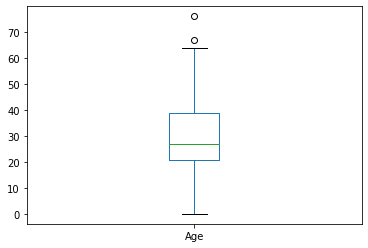

In [20]:
# identifikasi outlier variabel age pada data test
test['Age'].plot(kind='box')
plt.show()

In [21]:
# cek korelasi variabel age dengan variabel lainnya
corr = test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
corr[corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
3,Age,Age,1.000000
9,Age,Pclass,0.492143
11,Age,Fare,0.337932
19,Age,SibSp,0.091587
20,Age,Parch,0.061249
24,Age,PassengerId,0.034102


In [22]:
# mencari nilai median variabel age berdasarkan pcalss & sex
age_by_pclass_sex = test.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(test['Age'].median()))

Median age of Pclass 1 females: 41.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 24.0
Median age of Pclass 2 males: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 24.0
Median age of all passengers: 27.0


In [23]:
# mengganti missing value dengan nilai median berdasarkan pclass & sex
test['Age'] = test.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

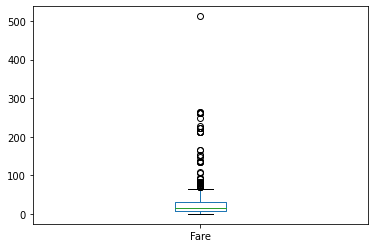

In [24]:
# identifikasi outlier variabel fare pada data test
test['Fare'].plot(kind='box')
plt.show()

In [25]:
# cek korelasi variabel fare dengan variabel lainnya
corr = test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
corr[corr['Feature 1'] == 'Fare']

,Feature 1,Feature 2,Correlation Coefficient
0,Fare,Fare,1.000000
6,Fare,Pclass,0.577147
10,Fare,Age,0.353408
15,Fare,Parch,0.230046
16,Fare,SibSp,0.171539
30,Fare,PassengerId,0.008211


In [26]:
# mencari nilai median variabel age berdasarkan pcalss & sex
fare_by_pclass = train.groupby(['Pclass']).median()['Fare']

for pclass in range(1, 4):
    print('Median fare of Pclass {}: {}'.format(pclass, fare_by_pclass[pclass]))
print('Median fare of all passengers: {}'.format(train['Fare'].median()))

Median fare of Pclass 1: 60.287499999999994
Median fare of Pclass 2: 14.25
Median fare of Pclass 3: 8.05
Median fare of all passengers: 14.4542


In [27]:
# mengganti missing value dengan nilai median berdasarkan pclass & sex
test['Fare'] = test.groupby(['Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

In [28]:
# hapus kolom cabin pada data test
test.drop(columns=['Cabin'], axis=0, inplace=True)

In [29]:
test.isnull().sum().to_frame().rename(columns={0:'Null Vallues'})[test.isnull().sum()>0]

,Null Vallues


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label = ['Sex', 'Embarked']
for i in label:
    train[i] = label_encoder.fit_transform(train[i]) 
    test[i] = label_encoder.fit_transform(test[i])

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


# **DATA MODELLING**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
x_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.7, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_predict = model.predict(x_test)
accuracy_score(y_test, y_predict)

0.8022388059701493